# 7.2.2. Компоненты временного ряда

Различные исторические и текущие явления могут повлиять на значения временного ряда, и эти события диагностируются как компоненты временного ряда. Очень важно уметь распознавать эти различные влияния или компоненты и раскладывать их.

В анализе временных рядов есть четыре основные компоненты: долгосрочное изменение или тренд, сезонные краткосрочные изменения, циклические краткосрочные изменения и случайные, или нерегулярные, колебания.

- Долгосрочное изменение или тренд.
- Краткосрочные изменения:
    - Сезонные колебания.
    - Циклические колебания.
- Случайные, или нерегулярные, колебания.

![image.png](attachment:image.png)

- **Тренд ($T_t$)** — плавное долгосрочное изменение уровня ряда, которое может выражаться в постепенном уменьшении или увеличении значений в течение длительного периода времени. 

Уровнем ряда называют среднее значение временного ряда.

- **Сезонные колебания или сезонная компонента ($S_t$)** — регулярные изменения уровня ряда с постоянным периодом. 

Этим периодом может быть час, день, неделя, месяц, квартал, год. Сезонность всегда фиксирована и известна.

Сезонность может быть привязана к определённому календарному временному интервалу: дню, неделе, месяцу (речь может идти о праздниках или выходных — например, рост продаж в Рождество) — либо относиться к какому-либо событию, которое прямо не соотносится с конкретными календарными интервалами (продажа зонтов и плащей в сезон дождей, продажа кондиционеров и бутилированной воды летом, количество автоаварий зимой).

- **Циклические колебания или циклическая компонента ($C_t$)** — изменения уровня ряда с переменным периодом. 

Один полный период — это цикл, но у цикла не будет конкретной предопределённой продолжительности. Классическим примером циклических изменений является деловой цикл, который представляет собой движение валового внутреннего продукта вниз и вверх относительно долгосрочного восходящего тренда: обычно он может длиться несколько лет, но продолжительность текущего делового цикла заранее неизвестна.

Первые три компоненты (тренд, сезонная компонента, циклическая компонента) часто называют сигналами, поскольку они фактически являются детерминированными индикаторами, которые можно получить из самих данных.

- **Случайные, или нерегулярные, колебания ($\varepsilon_t$)** — последний элемент, вызывающий вариации в данных временного ряда. 

Эти колебания неконтролируемы, непредсказуемы и непостоянны — например, землетрясения, войны, наводнения и любые другие стихийные бедствия. Каждая точка данных этих случайных колебаний не зависит от других сигналов, перечисленных выше, долгосрочных и краткосрочных движений. По этой причине эту компоненту часто называют шумом, потому что она обусловлена скрытыми переменными, которые трудно наблюдать, как показано на рисунке ниже.

![image.png](attachment:image.png)

Тренд и сезонность могут иметь аддитивный или мультипликативный характер.

Аддитивность проявляется в линейном или постоянном поведении компоненты.

Если тренд увеличивается или уменьшается линейно или близко к этому, он демонстрирует аддитивный паттерн. 

С другой стороны, если тренд показывает экспоненциальное изменение, положительное или отрицательное, то он демонстрирует мультипликативный паттерн. 

Сезонность следует аналогичной схеме. Однако здесь нас интересуют вариабельность амплитуды колебаний. Сезонные закономерности всегда возникают через определённые промежутки времени. 

- Когда амплитуда сезонных колебаний остаётся постоянной, сезонность демонстрирует аддитивный паттерн. 
- В противном случае, если амплитуда со временем меняется, сезонность демонстрирует мультипликативное поведение. 

На рисунке ниже приведены аддитивная и мультипликативная сезонности с аддитивным трендом.

![image.png](attachment:image.png)

- Аддитивная модель применима в тех случаях, когда амплитуда сезонных колебаний в ряду остаётся постоянной. 
- Мультипликативная модель применима в тех случаях, когда амплитуда сезонных колебаний изменяется со временем.

Проиллюстрируем декомпозицию временного ряда на конкретном примере.
Импортируем необходимые библиотеки.

In [ ]:
# Импортируем библиотеки NumPy и pandas
import numpy as np
import pandas as pd
import math

# Импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Импортируем библиотеку datetime для работы с датами
import datetime

# Отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')

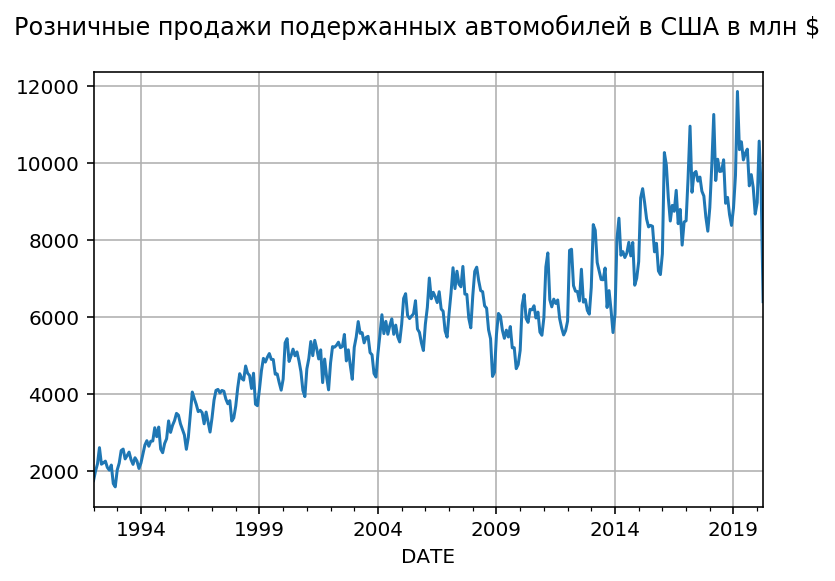

In [ ]:
# Конструируем парсер дат
mydateparser = lambda x: datetime.datetime.strptime(x, '%d-%m-%y')

# Загружаем данные
used_cars = pd.read_csv(
    './data/retail_sales_used_car_dealers_us_1992_2020.csv', 
    header=0, index_col=0, parse_dates=['DATE'], 
    date_parser=mydateparser)

# Визуализируем временной ряд
fig = plt.figure()
fig.suptitle('Розничные продажи подержанных автомобилей в США в млн $')
used_cars['Retail_Sales'].plot()
plt.grid()
plt.show()

На графике видно, что в данных присутствует восходящий тренд — увеличение продаж подержанных автомобилей со временем. 

Кроме того, можно наблюдать сезонность с пиком продаж в марте и минимумом в ноябре или декабре. И похоже, что амплитуда сезонных колебаний растёт от года к году, что предполагает мультипликативную зависимость.

Поэтому мы можем попробовать применить разложение временного ряда, предполагающее мультипликативную модель.

Давайте импортируем функцию seasonal_decompose() подмодуля seasonal модуля tsa библиотеки Statsmodels и с её помощью выполним процедуру декомпозиции.

In [ ]:
# Импортируем функцию seasonal_decompose() для декомпозиции
from statsmodels.tsa.seasonal import seasonal_decompose

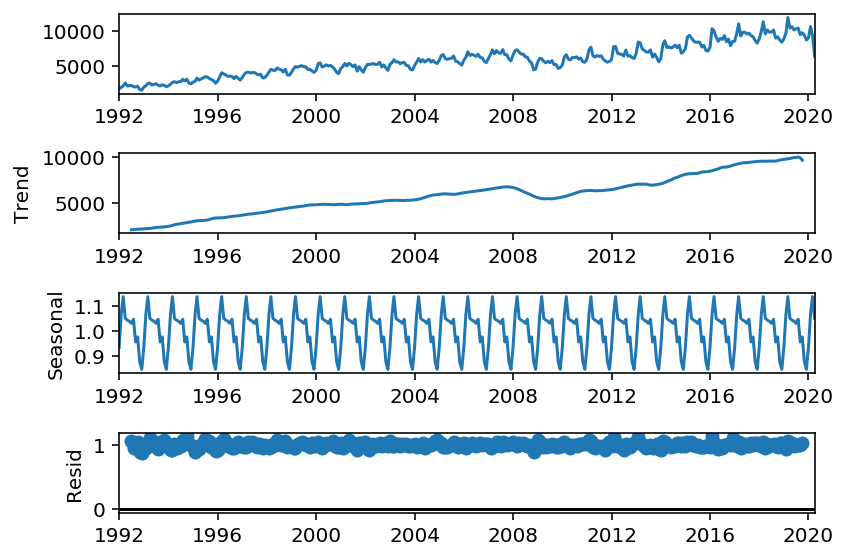

In [ ]:
# Выполняем декомпозицию временного ряда на составляющие: 
# тренд, сезонную компоненту и шум. Считаем,
# что модель ряда является мультипликативной

result = seasonal_decompose(
    used_cars, 
    model='multiplicative')

result.plot();

Можем заметить, что изображённые на графике значения тренда и сезонности подтверждают ранее выдвинутые предположения о восходящем тренде и годичной сезонности.

Разберёмся, как работает функция seasonal_deconpose() «под капотом».

Выполним вручную разложение временного ряда на компоненты: тренд, сезонность и шум, — используя простую процедуру, основанную на скользящих средних и включающую следующие шаги:
- `Шаг 1`: определяем длину сезонного периода.
- `Шаг 2`: выделяем тренд.
- `Шаг 3`: выделяем сезонность + шум.
- `Шаг 4`: выделяем сезонность.
- `Шаг 5`: выделяем шум.

Приступим к пошаговой декомпозиции данного ряда.

**Шаг 1.** Попробуем угадать продолжительность сезонной компоненты. В приведённом примере предполагаем, что это 12 месяцев.

**Шаг 2.** Теперь вычисляем на основе наших данных 12-месячное центрированное скользящее среднее (centered moving average, СМА).

Это скользящее среднее охватывает 13 месяцев, то есть по шесть месяцев слева и справа от центрального месяца. 12-месячное центрированное скользящее среднее представляет собой среднее значение двух скользящих средних, которые смещены друг от друга на один месяц, фактически являясь взвешенным скользящим средним. 
Это скользящее среднее сгладит сезонность с шумом и выявит тренд.
Давайте добавим столбец 2×12 СМА (TREND), вычислив центрированное скользящее среднее в Python.

Обратите внимание, что значения с индексами [i-6] и [i+6] берутся с весом 1/24, в то время как остальные значения — с весом 1/12.

In [ ]:
# Создаём столбец — центрированное скользящее среднее 2×12,
# этот столбец описывает тренд во временном ряду
used_cars['2 x 12 CMA (TREND)'] = np.nan

for i in range(6, used_cars['Retail_Sales'].size - 6):
    used_cars['2 x 12 CMA (TREND)'][i] = used_cars['Retail_Sales'][i - 6] * 1.0 / 24 + (
        used_cars['Retail_Sales'][i - 5] + 
        used_cars['Retail_Sales'][i - 4] + 
        used_cars['Retail_Sales'][i - 3] + 
        used_cars['Retail_Sales'][i - 2] + 
        used_cars['Retail_Sales'][i - 1] + 
        used_cars['Retail_Sales'][i] + 
        used_cars['Retail_Sales'][i + 1] + 
        used_cars['Retail_Sales'][i + 2] + 
        used_cars['Retail_Sales'][i + 3] + 
        used_cars['Retail_Sales'][i + 4] + 
        used_cars['Retail_Sales'][i + 5]
    ) * 1.0 / 12 + used_cars['Retail_Sales'][i + 6] * 1.0 / 24

Давайте визуализируем полученный временной ряд, значения которого находятся в столбце 2×12 СМА (TREND).

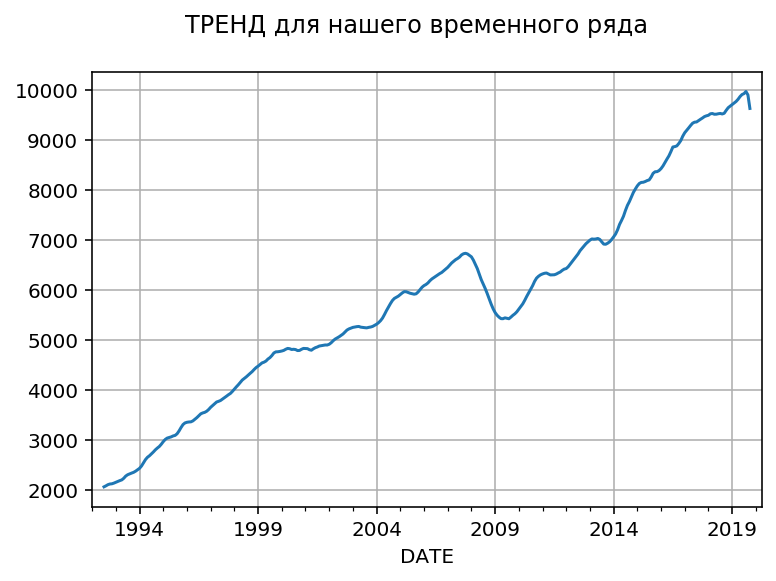

In [ ]:
# Визуализируем тренд
fig = plt.figure()
fig.suptitle('ТРЕНД для нашего временного ряда')
used_cars['2 x 12 CMA (TREND)'].plot()
plt.grid()
plt.show()

Видим, что применение скользящего среднего выявило тренд временного ряда.

**Шаг 3.** Теперь нужно принять решение относительно мультипликативности/аддитивности. В зависимости от того, является ли композиция мультипликативной или аддитивной, необходимо разделить или вычесть тренд из исходного временного ряда, чтобы получить сезонность и шум. Анализируя наш временной ряд, мы видим, что сезонные колебания увеличиваются пропорционально значению временного ряда. Следовательно, мы предполагаем, что сезонность мультипликативна. Также предположим, что и шум является мультипликативным.

Таким образом, мы полагаем, что наш временной ряд описывается мультипликативной моделью декомпозиции:

- Значение временного ряда = Тренд × Сезонность × Шум.

Поэтому:

- Сезонность × Шум = Значение временного ряда / тренд.
 
Добавим новый столбец SEASONALITY AND NOISE в наш датафрейм данных и заполним его произведением сезонности и шума, используя вышеприведённую формулу.

In [ ]:
# Создаём столбец, содержащий сезонность и шум
used_cars['SEASONALITY AND NOISE'] = used_cars['Retail_Sales'] / used_cars['2 x 12 CMA (TREND)']

Давайте визуализируем полученный временной ряд, значения которого находятся в столбце SEASONALITY AND NOISE.

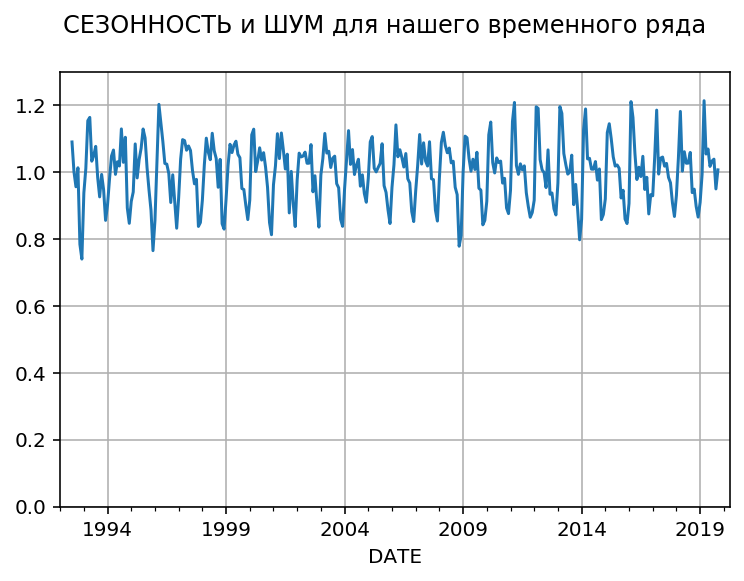

In [ ]:
# Визуализируем сезонность и шум 
fig = plt.figure()
fig.suptitle('СЕЗОННОСТЬ и ШУМ для нашего временного ряда')
plt.ylim(0, 1.3)
used_cars['SEASONALITY AND NOISE'].plot()
plt.grid()
plt.show()

**Шаг 4.** Далее выделим «очищенную» сезонность из комбинации сезонности и шума, вычислив среднее значение сезонности для всех январей, всех февралей и так далее.

In [ ]:
# Вычисляем средние значения сезонности по каждому месяцу

# Сначала добавляем столбец с месяцами
used_cars['MONTH'] = used_cars.index.strftime('%m').astype(np.int)

# Инициализируем месяц на основе словарей, в которых по каждому месяцу будет
# храниться суммарное значение сезонности и количество значений сезонности 
average_seasonal_values = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 
                           7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}
average_seasonal_value_counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 
                                 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}

# Вычисляем суммы и частоты
for i in range(0, used_cars['SEASONALITY AND NOISE'].size):
    if math.isnan(used_cars['SEASONALITY AND NOISE'][i]) is False:
        average_seasonal_values[used_cars['MONTH'][i]] = (average_seasonal_values[used_cars['MONTH'][i]] + 
                                                          used_cars['SEASONALITY AND NOISE'][i])
        average_seasonal_value_counts[used_cars['MONTH'][i]] = average_seasonal_value_counts[used_cars['MONTH'][i]] + 1

# Вычисляем среднее значение сезонности по каждому месяцу
for i in range(1, 13):
    average_seasonal_values[i] = average_seasonal_values[i] / average_seasonal_value_counts[i]

# Создаём столбец SEASONALITY и заполняем его средними 
# значениями сезонности для каждого месяца
used_cars['SEASONALITY'] = np.nan
for i in range(0, used_cars['SEASONALITY AND NOISE'].size):
    if math.isnan(used_cars['SEASONALITY AND NOISE'][i]) is False:
        used_cars['SEASONALITY'][i] = average_seasonal_values[used_cars['MONTH'][i]]

Давайте визуализируем полученный временной ряд, значения которого находятся в столбце SEASONALITY.

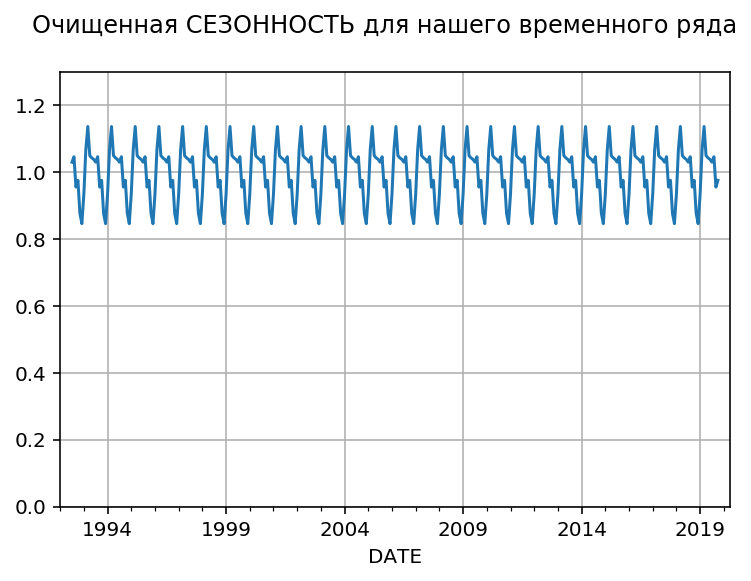

In [ ]:
# Визуализируем «очищенную» сезонность
fig = plt.figure()
fig.suptitle('Очищенная СЕЗОННОСТЬ для нашего временного ряда')
plt.ylim(0, 1.3)
used_cars['SEASONALITY'].plot()
plt.grid()
plt.show()

**Шаг 5.** Наконец, разделим полученную ранее комбинацию шума и сезонности на усреднённую сезонность, чтобы получить шум для каждого месяца.

- Шум = Сезонность × Шум / Усреднённая сезонность.

In [ ]:
# Создаём столбец NOISE и заполняем его средними 
# значениями шума для каждого месяца
used_cars['NOISE'] = used_cars['SEASONALITY AND NOISE'] / used_cars['SEASONALITY']

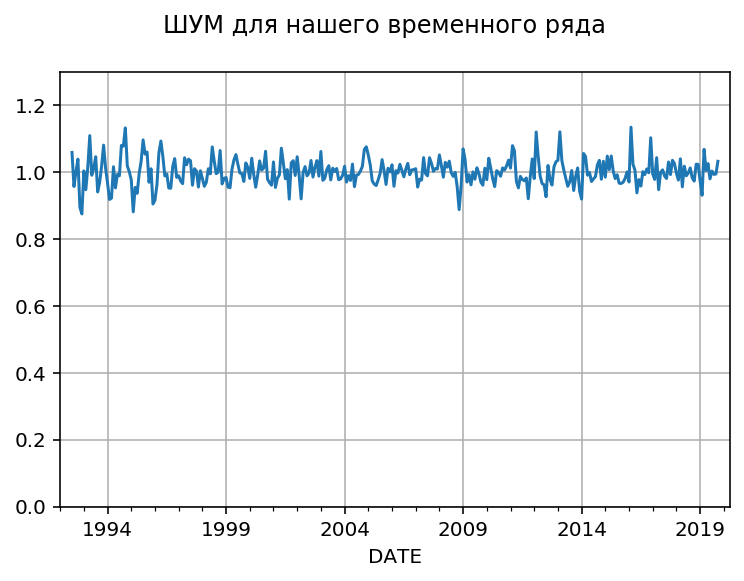

In [ ]:
# Визуализируем шум
fig = plt.figure()
fig.suptitle('ШУМ для нашего временного ряда')
plt.ylim(0, 1.3)
used_cars['NOISE'].plot()
plt.grid()
plt.show()